In [2]:
#データ加工、処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series ,DataFrame
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import roc_curve,auc

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#機械学習ライブラリ
import sklearn

%precision 3

'%.3f'

### 総合演習問題(1)

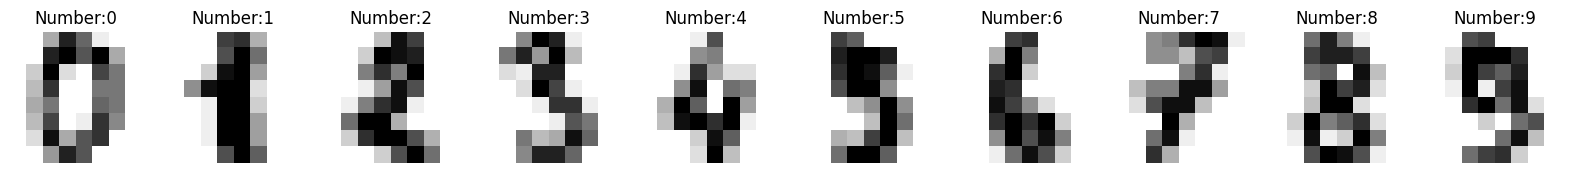

In [3]:
#分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

#画像の表示
plt.figure(figsize=(20,5))
for label,img in zip(digits.target[:10],digits.images[:10]):
    plt.subplot(1,10,label+1)
    plt.axis('off')
    plt.imshow(img,cmap = plt.cm.gray_r,interpolation = 'nearest')
    plt.title('Number:{0}'.format(label))

##### 決定木による判別

In [4]:

from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(
    digits.images,
    digits.target,
    random_state = 0
    )
#データの加工(決定木は３次元配列を受け付けないらしい)
#Found array with dim 3. DecisionTreeClassifier expected <= 2.
#reshapeで8*8を1*64に変換する。reshapeはビューを渡すのでcopyを取って代入する。
X_train = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape(X_test .shape[0], (X_test .shape[1]*X_test.shape[2]))

#決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))

正解率(train):0.819
正解率(test):0.733


In [5]:
#SVMでの結果を混同行列にする
#インポート
from sklearn.metrics import confusion_matrix

#テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print('confusion matrix :\n{}'.format(m))

confusion matrix :
[[35  0  0  0  0  0  1  0  0  1]
 [ 0 24  6  3  1  3  4  2  0  0]
 [ 0  1 31  4  0  0  2  0  5  1]
 [ 0  1  1 34  0  1  1  1  3  3]
 [ 0  2  0  0 30  0  0  6  0  0]
 [ 0  1  0  1  1 42  0  2  0  1]
 [ 0  1  0  0  0  1 47  0  3  0]
 [ 0  3  0  0  3  1  0 41  0  0]
 [ 0  5 12  2  0  2  0  8 17  2]
 [ 0  3  3  4  0  2  0  3  3 29]]


1,8の判別精度が悪い

#### 他クラス分類での判別

正解率(train):0.973
正解率(test):0.867


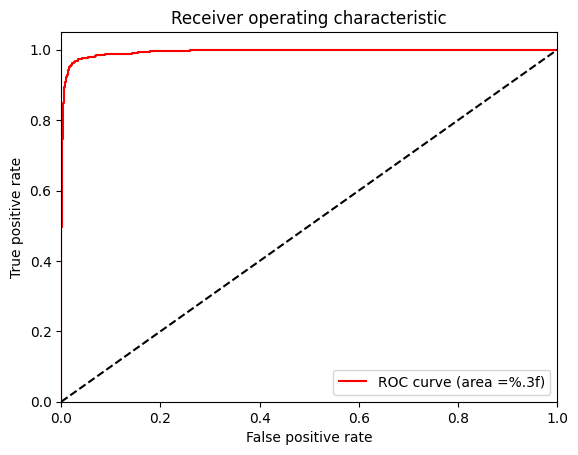

In [6]:
#他クラス分類での分類
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

digits = load_digits()
X_train,X_test,y_train,y_test=train_test_split(
    digits.images,
    digits.target,
    random_state = 0
    )
#データの加工(決定木は３次元配列を受け付けないらしい)
#Found array with dim 3. DecisionTreeClassifier expected <= 2.
#reshapeで8*8を1*64に変換する。reshapeはビューを渡すのでcopyを取って代入する。
X_train = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape(X_test .shape[0], (X_test .shape[1]*X_test.shape[2]))

y_train = label_binarize(y_train,classes = [0,1,2,3,4,5,6,7,8,9])
y_test = label_binarize(y_test,classes = [0,1,2,3,4,5,6,7,8,9])

#決定木クラスの初期化と学習
model = OneVsRestClassifier(SVC(kernel = 'linear',probability=True,random_state=0))
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))
#予測確率を取得(probability = Trueじゃないと使えない)
y_score = model.predict_proba(X_test)

#np.ravelでonehotvectorから１変数に
fpr,tpr,_= roc_curve(y_test.ravel(),y_score.ravel())
roc_auc = auc(fpr,tpr)

#ROC曲線の描画
plt.plot(fpr,tpr,color='red',label='ROC curve (area =%.3f)'.format(roc_auc))
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "best")

#### 総合演習問題(2)
アワビの年齢予測  
https://www.statlab.co.jp/seminar/abalone01.html

In [7]:
import requests ,zipfile
import io
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
res = requests.get(url).content
abalone =pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
#Diam:直径、Whole:全ての重量、Shocked:肉の部分の重さ、Viscera:血液をのぞいた腸重量、
# Shell:乾燥後の殻の重さ、Rings:年輪?(＋1.5で年齢)
abalone.columns=['Sex','Length','Diam','Height','Whole','Shocked(g)','Viscera','Shell','Rings']

In [8]:
abalone

,Sex,Length,Diam,Height,Whole,Shocked(g),Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0
...,...,...,...,...,...,...,...,...,...
313,Content-Type: text/html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Pragma: no-cache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Expires: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,Continue: close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('データ形式:{}'.format(abalone.shape))
print('欠損データの数:{}'.format(abalone.isnull().sum().sum()))

print('データ型の確認\n{}'.format(abalone.dtypes))

データ形式:(318, 9)
欠損データの数:73
データ型の確認
Sex            object
Length        float64
Diam          float64
Height        float64
Whole         float64
Shocked(g)    float64
Viscera       float64
Shell          object
Rings         float64
dtype: object


<Axes: >

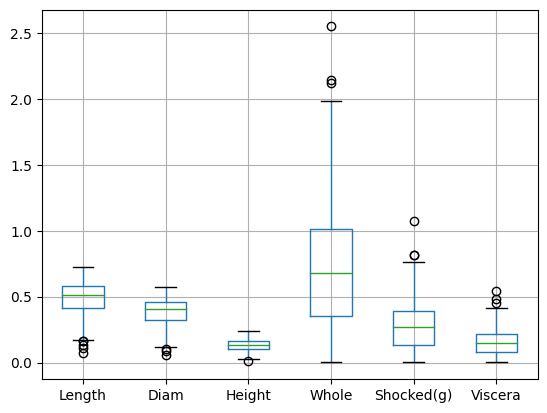

In [10]:
abalone[['Length','Diam','Height','Whole','Shocked(g)','Viscera','Shell']].boxplot()

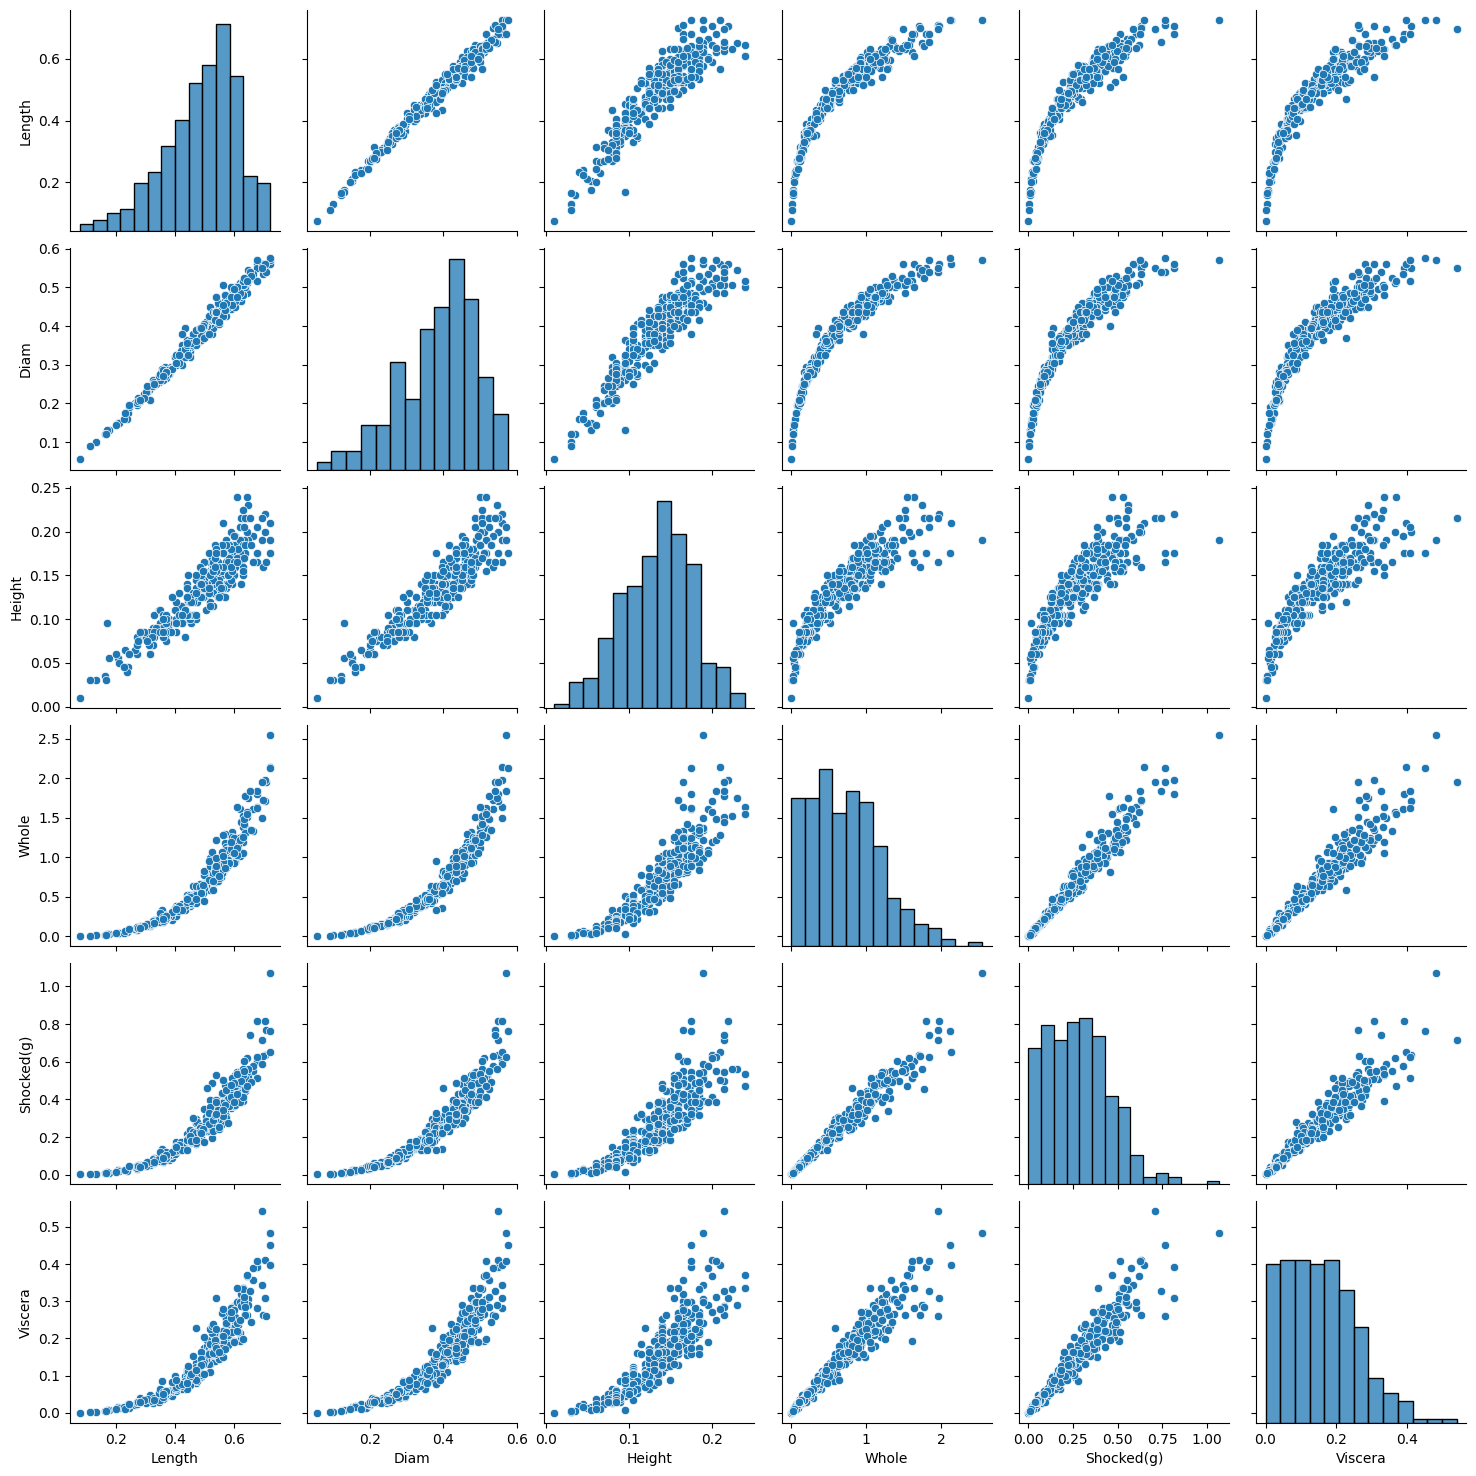

In [11]:
#ヒストグラムと散布図の出力
sns.pairplot(abalone[['Length','Diam','Height','Whole','Shocked(g)','Viscera','Shell']])
plt.grid()

In [12]:
#Sexをダミー変数化し結合
abalone_sex = pd.get_dummies(abalone['Sex'])
df_abalone = pd.concat([abalone,abalone_sex],axis =1).drop('Sex',axis =1)

In [13]:
df_abalone

,Length,Diam,Height,Whole,Shocked(g),Viscera,Shell,Rings,<html><body>You are being <a href='http://wired.meraki.com:8090/blocked.cgi?blocked_server=128.195.10.252:80&amp;blocked_url=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Fabalone%2Fabalone.data'>redirected</a>.</body></html>,Cache-Control: no-cache,Content-Length: 248,Content-Type: text/html,Continue: close,Expires: 0,F,I,Location: http://wired.meraki.com:8090/blocked.cgi?blocked_server=128.195.10.252:80&blocked_url=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Fabalone%2Fabalone.data,M,Pragma: no-cache
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0,False,False,False,False,False,False,False,False,False,True,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0,False,False,False,False,False,False,False,False,False,True,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0,False,False,False,False,False,False,True,False,False,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,False,False,False,False,False,False,False,False,False,True,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,False,False,False,False,False,False
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,True
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,True,False,False,False,False,False
316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False


標準化して重回帰

In [1]:
#標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#重回帰のためのインポート
from sklearn.linear_model import LinearRegression

#目的関数にprice,説明変数はそれ以外
X=df_abalone.drop('Rings',axis =1)
y=df_abalone['Rings']

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#標準化処理
sc= StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std = sc.transform(X_test)


#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train_std,y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train_std,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test_std,y_test)))

#回帰係数
print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

NameError: name 'df_abalone' is not defined

In [ ]:
#変数選択
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=LinearRegression(),
)
rfecv.fit(X_train, y_train)
rfecv.support_

#目的関数にprice,説明変数はそれ以外

X=X[X.columns[rfecv.support_]]
y=df_abalone['Rings']

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#標準化処理
sc= StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std = sc.transform(X_test)


#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train_std,y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train_std,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test_std,y_test)))

#回帰係数
print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.535
決定係数(test):0.543

回帰係数
Diam          1.086760e+00
Height        3.259382e-01
Whole         4.507040e+00
Shocked(g)   -4.504293e+00
Viscera      -1.163122e+00
Shell         1.245213e+00
F            -5.073341e+12
I            -5.062253e+12
M            -5.265950e+12
dtype: float64
切片:9.964


変数選択の関数RFECVを使ったがほとんど変わらなかった

#### 総合演習問題(3)
金融データ

In [21]:
#対象データの読み込み
bank=pd.read_csv('bank-full.csv',sep = ';')

#先頭の５行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
#問題1基本統計量の出力
bank[['age','balance','day','duration','campaign','pdays','previous']].agg(['count','max','min','std'])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441


In [23]:
#問題2 
#job
print(bank.groupby(['job','y'])['y'].count().unstack())
#education
print(bank.groupby(['education','y'])['y'].count().unstack())
#default
print(bank.groupby(['default','y'])['y'].count().unstack())
#housing
print(bank.groupby(['housing','y'])['y'].count().unstack())
#loan
print(bank.groupby(['loan','y'])['y'].count().unstack())

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252
y           no   yes
default             
no       39159  5237
yes        763    52
y           no   yes
housing             
no       16727  3354
yes      23195  1935
y        no   yes
loan             
no    33162  4805
yes    6760   484


### 問題3ロジ

In [24]:
#問題3
#ロジスティック回帰
#データ分割のためのインポート
from sklearn.model_selection import train_test_split
#ロジスティック回帰のためのインポート
from sklearn.linear_model import LogisticRegression
#ダミー変数化し結合
bank_dummy = pd.get_dummies(bank[['job','marital','education','default','housing','loan','contact','month','poutcome']])
df_bank = pd.concat([bank,bank_dummy],axis =1).drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis =1)

X=df_bank.drop('y',axis =1)
y=df_bank['y']

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

#ロジスティック回帰クラスの初期化と学習
model1 = LogisticRegression()
model1.fit(X_train,y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model1.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model1.score(X_test,y_test)))

決定係数(train):0.891
決定係数(test):0.891


/Users/ogawakoshin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
set(y_test)

{'no', 'yes'}

In [26]:
#ロジスティック回帰での結果を混同行列にする
#インポート
from sklearn.metrics import confusion_matrix

#テストデータを使って予測値を算出
y_pred = model1.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print('confusion matrix :\n{}'.format(m))

#正解率
accuracy=(m[0,0]+m[1,1])/m.sum()

#適合度
precision=(m[1,1])/m[:,1].sum()
#１と予測した中でどれだけ１であったかの割合

#再現率
recall = (m[1,1])/m[1,:].sum()
#実際に１だった中で正しく１と予測できた割合

#F1スコア
f1 = 2*(precision*recall)/(precision+recall)
#適合率と再現率の調和平均

print('正解率:{:.3f}'.format(accuracy))
print('適合度:{:.3f}'.format(precision))
print('再現度:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

confusion matrix :
[[19560   408]
 [ 2056   582]]
正解率:0.891
適合度:0.588
再現度:0.221
F1値:0.321


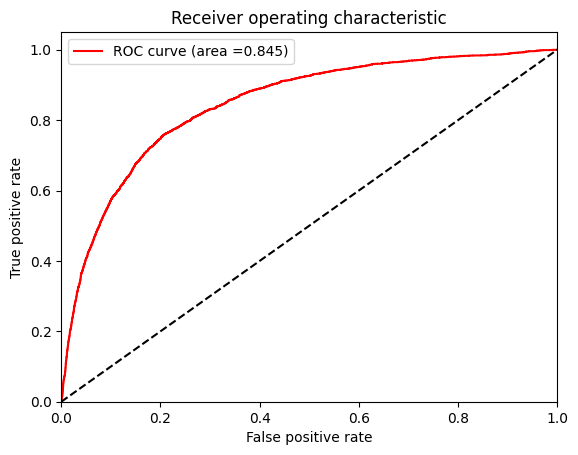

In [27]:
#予測確率の算出
y_pred1 = model1.predict_proba(X_test)[:,1]
y_test = [1 if i =='yes' else 0 for i in y_test ]


#偽陽性率と真陽性率の算出
fpr,tpr,_= roc_curve(y_test,y_pred1)

#AUCの算出
auc1 = auc(fpr,tpr)

#ROC曲線の描画
plt.plot(fpr,tpr,color='red',label='ROC curve (area =%.3f)'% auc1)
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "best")

### 問題３決定木

In [28]:
#問題3
#決定木
#データ分割のためのインポート
from sklearn.model_selection import train_test_split
#ダミー変数化し結合
bank_dummy = pd.get_dummies(bank[['job','marital','education','default','housing','loan','contact','month','poutcome']])
df_bank = pd.concat([bank,bank_dummy],axis =1).drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis =1)

#訓練データとテストデータに分ける
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

#決定木クラスの初期化と学習
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model2.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model2.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model2.score(X_test,y_test)))

正解率(train):0.906
正解率(test):0.900


In [29]:
#決定木での結果を混同行列にする
#インポート
from sklearn.metrics import confusion_matrix

#テストデータを使って予測値を算出
y_pred = model2.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print('confusion matrix :\n{}'.format(m))

#正解率
accuracy=(m[0,0]+m[1,1])/m.sum()

#適合度
precision=(m[1,1])/m[:,1].sum()
#１と予測した中でどれだけ１であったかの割合

#再現率
recall = (m[1,1])/m[1,:].sum()
#実際に１だった中で正しく１と予測できた割合

#F1スコア
f1 = 2*(precision*recall)/(precision+recall)
#適合率と再現率の調和平均

print('正解率:{:.3f}'.format(accuracy))
print('適合度:{:.3f}'.format(precision))
print('再現度:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

confusion matrix :
[[19520   448]
 [ 1823   815]]
正解率:0.900
適合度:0.645
再現度:0.309
F1値:0.418


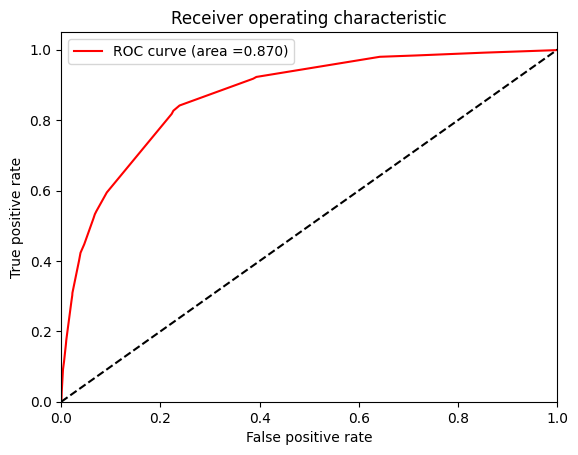

In [30]:
#予測確率の算出
y_pred2 = model2.predict_proba(X_test)[:,1]
y_test = [1 if i =='yes' else 0 for i in y_test ]

#偽陽性率と真陽性率の算出
fpr,tpr,_= roc_curve(y_test,y_pred2)

#AUCの算出
auc1 = auc(fpr,tpr)

#ROC曲線の描画
plt.plot(fpr,tpr,color='red',label='ROC curve (area =%.3f)'% auc1)
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "best")

#### 総合演習問題(4)
ロジスティック回帰の精度の向上

In [31]:
#前回の回答
#標準化のためのモジュール
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#ロジスティック回帰
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=0
)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__,clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.9906103286384976
test: LogisticRegression 0.958041958041958
Confution matrix:
[[50  3]
 [ 3 87]]


In [32]:
#変数選択
from sklearn.feature_selection import RFECV
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=0
)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

rfecv = RFECV(
    estimator=LogisticRegression(),
)
rfecv.fit(X_train_std, y_train)
rfecv.support_

#変数選択によって省かれたものを除く
X=cancer.data[:,rfecv.support_]
y=cancer.target

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#標準化処理
sc= StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std = sc.transform(X_test)


#ロジステック回帰クラスの初期化と学習
model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__,clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.9624413145539906
test: LogisticRegression 0.972027972027972
Confution matrix:
[[51  2]
 [ 2 88]]


変数選択RFECV関数を用いることによって標準化のみのテストデータでの精度を上回った

### 総合演習問題(5)
時系列データ

In [34]:
import pandas_datareader.data as pdr

start_data = '2001-01-02'
end_data = '2016-12-30'

fx_jpusdata = pdr.DataReader("DEXJPUS","fred",start_data,end_data)

fx_useudata = pdr.DataReader("DEXUSEU","fred",start_data,end_data)


In [35]:
#問題1 欠損を前日から埋める
fx_jpusdata = fx_jpusdata.fillna(method='ffill')
fx_useudata = fx_useudata.fillna(method='ffill')

In [36]:
#問題2 統計量と時系列データのグラフ化
fx_jpusdata.agg(['mean','max','min','std','count'])

,DEXJPUS
mean,105.775220
max,134.770000
min,75.720000
std,14.612526
count,4174.000000


In [37]:
fx_jpusdata.describe()

,DEXJPUS
count,4174.000000
mean,105.775220
std,14.612526
min,75.720000
25%,95.365000
50%,108.105000
75%,118.195000
max,134.770000


<Axes: xlabel='DATE'>

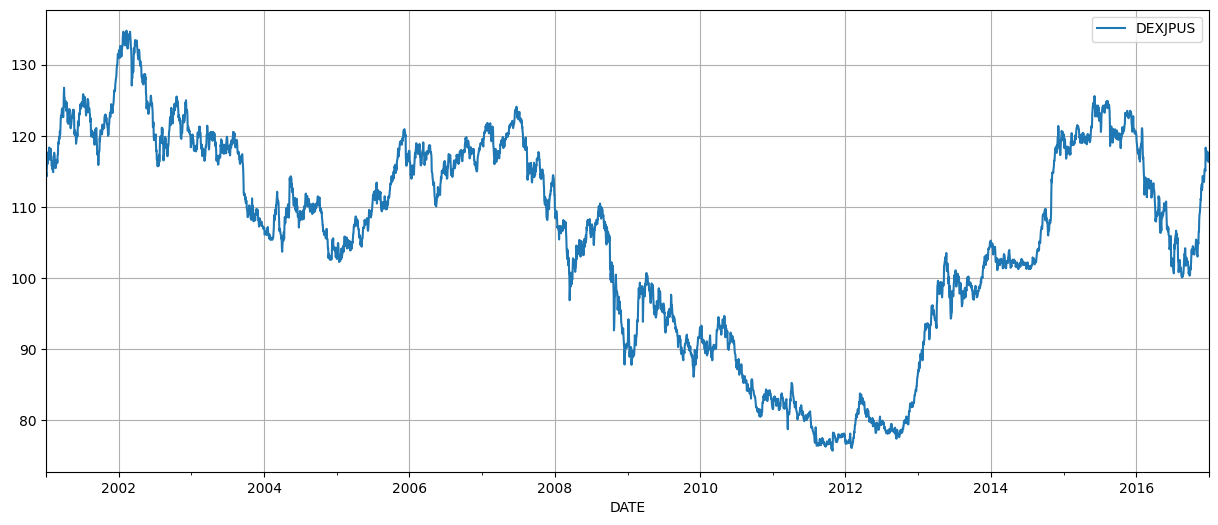

In [38]:
fx_jpusdata.plot(figsize=(15,6),legend='best',grid=True)

In [39]:
fx_useudata.agg(['mean','max','min','std','count'])

,DEXUSEU
mean,1.239633
max,1.601000
min,0.837000
std,0.165265
count,4174.000000


<Axes: xlabel='DATE'>

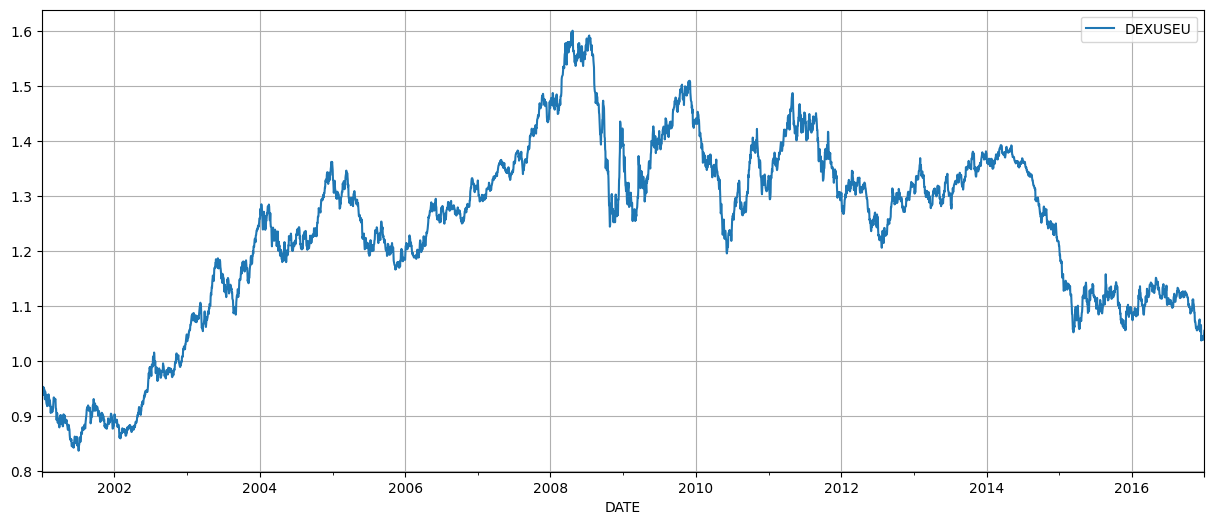

In [40]:
fx_useudata.plot(figsize=(15,6),legend='best',grid=True)

In [41]:
#問題3 変化率の算出
fx_jpusdata['diff_1']=fx_jpusdata['DEXJPUS'].shift(1)
fx_jpusdata['diff_2']=fx_jpusdata['DEXJPUS'].shift(2)
fx_jpusdata['diff_3']=fx_jpusdata['DEXJPUS'].shift(3)

In [48]:
#変化率の計算
fx_jpusdata['diff_rate']=fx_jpusdata.apply(lambda x:(x['DEXJPUS']-x['diff_1'])/x['diff_1'],axis=1)

In [50]:
fx_jpusdata.head()

,DEXJPUS,diff_1,diff_2,diff_3,diff_rate
DATE,,,,,
2001-01-02,114.73,NaN,NaN,NaN,NaN
2001-01-03,114.26,114.73,NaN,NaN,-0.004097
2001-01-04,115.47,114.26,114.73,NaN,0.010590
2001-01-05,116.19,115.47,114.26,114.73,0.006235
2001-01-08,115.97,116.19,115.47,114.26,-0.001893


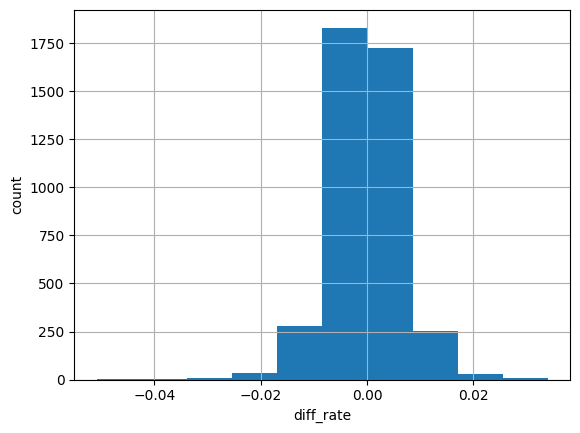

In [52]:
plt.hist(fx_jpusdata['diff_rate'])
plt.xlabel('diff_rate')
plt.ylabel('count')
plt.grid(True)

In [71]:
#2016年11月学習、2016年12月テスト、重回帰
#目的関数にDEXJPUS,説明変数はそれ以外期間で分ける
X_train = fx_jpusdata.query('"2016-11-01"<=DATE<="2016-11-30"').drop('DEXJPUS',axis = 1)
y_train = fx_jpusdata.query('"2016-11-01"<=DATE<="2016-11-30"')['DEXJPUS']
X_test = fx_jpusdata.query('"2016-12-01"<=DATE<="2016-12-31"').drop('DEXJPUS',axis = 1)
y_test = fx_jpusdata.query('"2016-12-01"<=DATE<="2016-12-31"')['DEXJPUS']

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

#回帰係数
print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):1.000
決定係数(test):0.998

回帰係数
diff_1         0.996553
diff_2         0.000794
diff_3         0.006797
diff_rate    107.136857
dtype: float64
切片:-0.438


In [76]:
#2015年11月学習、2015年12月テスト、重回帰
#目的関数にDEXJPUS,説明変数はそれ以外期間で分ける
X_train = fx_jpusdata.query('"2015-11-01"<=DATE<="2015-11-30"').drop('DEXJPUS',axis = 1)
y_train = fx_jpusdata.query('"2015-11-01"<=DATE<="2015-11-30"')['DEXJPUS']
X_test = fx_jpusdata.query('"2015-12-01"<=DATE<="2015-12-31"').drop('DEXJPUS',axis = 1)
y_test = fx_jpusdata.query('"2015-12-01"<=DATE<="2015-12-31"')['DEXJPUS']

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

#回帰係数
print('\n回帰係数\n{}'.format(pd.Series(model.coef_,index=X.columns)))
print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):1.000
決定係数(test):1.000

回帰係数
diff_1         1.000100
diff_2         0.001078
diff_3         0.000201
diff_rate    122.419963
dtype: float64
切片:-0.170


#### 総合演習問題(6)
米国の旅客飛行機のフライトデータ  
https://dataverse.harvard.edu/dataset.xhtml?persistentld=doi:10.7910/DVN/HG7NV7  
urlに飛ぶことができない